In [246]:
import pandas as pd
import flair
import numpy as np
import time
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from unidecode import unidecode


In [247]:
df = pd.read_csv('../Annotated Final Database.csv', encoding='utf-8')
df

,Unnamed: 0,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time
0,0,0,1254569956672450561,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",BREAK CURFEW! \r\r\n\r\r\n#COVID1984\r\r\n#SCA...,2020-11-09 13:08:18,2020-11-09,13:08:18
1,1,1,1255080816994025474,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",A MASK is better than a VENTILATOR.\r\r\nHOME ...,2020-11-09 06:13:41,2020-11-09,06:13:41
2,2,2,1251864580298506243,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",The latest One Wireless Place Times! https://t...,2020-11-09 11:04:41,2020-11-09,11:04:41
3,3,3,1248753789177335808,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",#Kenya Nakuru - over 500 customers ignoring c...,2020-11-08 09:05:59,2020-11-08,09:05:59
4,4,4,1252408156036030465,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",Bandaragama Police arrested a suspect who misu...,2020-11-04 12:57:17,2020-11-04,12:57:17
...,...,...,...,...,...,...,...,...,...,...
194255,194255,194255,1252672175032668161,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What is the potential of #5G? What will be its...,2020-07-30 08:31:09,2020-07-30,08:31:09
194256,194256,194256,1248011136999419906,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Until now #Terroristan and #Chinese used to se...,2020-07-21 05:34:28,2020-07-21,05:34:28
194257,194257,194257,1248369367865270273,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Serious question: If someone deliberately coug...,2020-08-01 22:13:01,2020-08-01,22:13:01
194258,194258,194258,1250196981550481408,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What's the thinking behind gathering in large ...,2020-08-02 01:23:47,2020-08-02,01:23:47


In [248]:
df['Tweet'] = [unidecode(tweet) for tweet in df['Tweet']]

In [249]:
### BETTER SENTIMENT ANALYZER, BUT TAKES TOO LONG AND PRETRAINED ON IMDB REVIEWS, NOT AS GOOD FOR TWEETS
# t0 = time.time()
# flair_sentiment = flair.models.TextClassifier.load('sentiment-fast')
# s = flair.data.Sentence(sentence)
# flair_sentiment.predict(s)
# total_sentiment = s.labels
# t1 = time.time() - t0
# print(total_sentiment)
# print(t1)

In [250]:
"""
If you use the VADER sentiment analysis tools, please cite:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
"""
new_words = {
    '#covidiot': -1.4, 
    '#covidiots': -1.5
}

sia = SentimentIntensityAnalyzer()
sia.lexicon.update(new_words)
#sia.lexicon
#nltk.download('vader_lexicon')

In [251]:
#sentence = "good stuff!"
#t2 = time.time()
def assign_sentiment(tweet):
    scores = sia.polarity_scores(tweet)
    if scores['compound'] >= 0.1:
        return 'positive'
    elif scores['compound'] <= -0.1:
        return 'negative'
    else:
        return 'neutral'
    
#print(time.time() - t0)

sentiments = [assign_sentiment(tweet) for tweet in df['Tweet']]
df['Sentiment'] = sentiments

In [252]:
df.to_csv('../SentimentData.csv')

In [253]:
# sia.polarity_scores("Hospitality businesses hammered in Nicola Sturgeon's new curfew and shutdown.")

In [254]:
df['Sentiment'].value_counts()

negative    94196
positive    57768
neutral     42296
Name: Sentiment, dtype: int64

In [255]:
df

,Unnamed: 0,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time,Sentiment
0,0,0,1254569956672450561,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",BREAK CURFEW! \r\r\n\r\r\n#COVID1984\r\r\n#SCA...,2020-11-09 13:08:18,2020-11-09,13:08:18,neutral
1,1,1,1255080816994025474,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",A MASK is better than a VENTILATOR.\r\r\nHOME ...,2020-11-09 06:13:41,2020-11-09,06:13:41,positive
2,2,2,1251864580298506243,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",The latest One Wireless Place Times! https://t...,2020-11-09 11:04:41,2020-11-09,11:04:41,neutral
3,3,3,1248753789177335808,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",#Kenya Nakuru - over 500 customers ignoring c...,2020-11-08 09:05:59,2020-11-08,09:05:59,negative
4,4,4,1252408156036030465,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",Bandaragama Police arrested a suspect who misu...,2020-11-04 12:57:17,2020-11-04,12:57:17,negative
...,...,...,...,...,...,...,...,...,...,...,...
194255,194255,194255,1252672175032668161,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What is the potential of #5G? What will be its...,2020-07-30 08:31:09,2020-07-30,08:31:09,positive
194256,194256,194256,1248011136999419906,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Until now #Terroristan and #Chinese used to se...,2020-07-21 05:34:28,2020-07-21,05:34:28,negative
194257,194257,194257,1248369367865270273,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Serious question: If someone deliberately coug...,2020-08-01 22:13:01,2020-08-01,22:13:01,negative
194258,194258,194258,1250196981550481408,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What's the thinking behind gathering in large ...,2020-08-02 01:23:47,2020-08-02,01:23:47,negative


In [256]:
CATEGORIES = [
    'Public authority actions, policy, and communications', 
    'Community spread and impact',
    'Medical advice and self-treatments',
    'Claims about prominent actors',
    'Conspiracy theories',
    'Virus transmission',
    'Virus origin and properties',
    'Public preparedness, protests, and civil disobedience',
    'Vaccines, medical treatments, and tests',
]

cat_counts = [len(df[df['Category'] == cat]) for cat in CATEGORIES]
cat_idx = list(range(1,10))

sent_dict = {}
sdict_norm = {}

sent_vc = df[["Category", "Sentiment"]].value_counts()
for (cat, sen), c in sent_vc.iteritems(): 
    idx = CATEGORIES.index(cat)
    if idx not in sent_dict:
        sent_dict[idx] = {}
    if sen not in sent_dict[idx]:
        sent_dict[idx][sen] = 0
    sent_dict[idx][sen] = c

sent_dict = dict(sorted(sent_dict.items()))

# Lists of sentiment frequencies for each category 
negatives = [sent_dict[i]['negative'] for i in range(9)] 
positives = [sent_dict[i]['positive'] for i in range(9)]
neutrals = [sent_dict[i]['neutral'] for i in range(9)]

norm_neg = [(round(negatives[i]/cat_counts[i],4))*100 for i in range(9)] # Percentages with two decimals
norm_pos = [(round(positives[i]/cat_counts[i],4))*100 for i in range(9)]
norm_neut = [(round(neutrals[i]/cat_counts[i],4))*100 for i in range(9)]

print(cat_counts)

[54331, 39024, 23029, 11393, 11473, 19975, 7995, 10139, 16901]


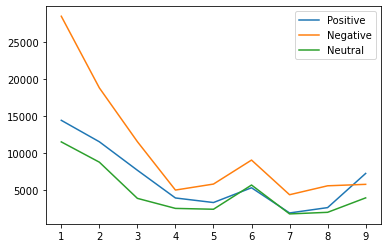

In [257]:
import matplotlib.pyplot as plt

plt.plot(cat_idx, positives, label = "Positive")
plt.plot(cat_idx, negatives, label = "Negative")
plt.plot(cat_idx, neutrals, label = "Neutral")
plt.legend()
plt.show()

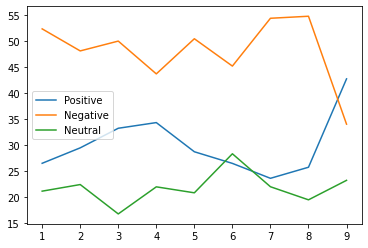

In [258]:
plt.plot(cat_idx, norm_pos, label = "Positive")
plt.plot(cat_idx, norm_neg, label = "Negative")
plt.plot(cat_idx, norm_neut, label = "Neutral")
plt.legend()
plt.show()

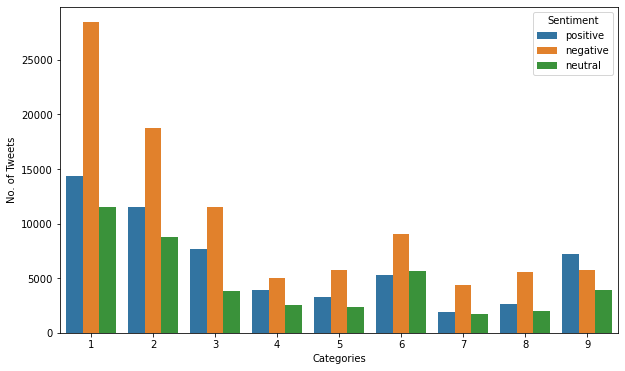

In [259]:
import seaborn as sns

plot_df = pd.DataFrame(zip(cat_idx*9, ["positive"]*9 + ['negative']*9 + ['neutral']*9, positives + negatives + neutrals), columns = ['Categories', 'Sentiment', 'No. of Tweets'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Categories", hue="Sentiment", y="No. of Tweets", data=plot_df)
plt.show()


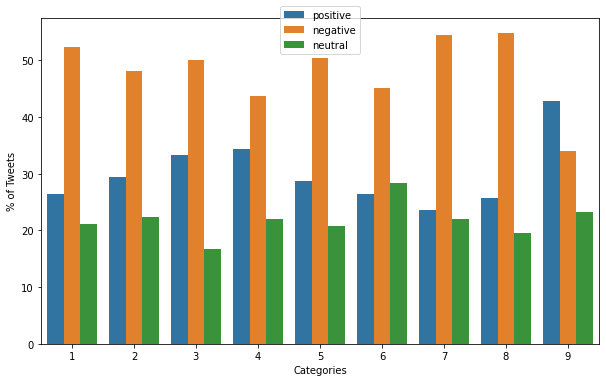

In [260]:
plot_df = pd.DataFrame(zip(cat_idx*9, ["positive"]*9 + ['negative']*9 + ['neutral']*9, norm_pos + norm_neg + norm_neut), columns = ['Categories', 'Sentiment', '% of Tweets'])
plt.figure(figsize=(10, 6))
g = sns.barplot(x="Categories", hue="Sentiment", y="% of Tweets", data=plot_df)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05))
plt.show()

In [261]:
top50cids = sorted(list(df['Claim ID'].unique()))
claim_counts = [len(df[df['Claim ID'] == cid]) for cid in top50cids]


claim_sents = {}

vc2 = df[["Claim ID", "Sentiment"]].value_counts()
for (cid, sen), c in vc2.iteritems(): 
    if cid not in claim_sents:
        claim_sents[cid] = {}
    if sen not in claim_sents[cid]:
        claim_sents[cid][sen] = 0
    claim_sents[cid][sen] = c

claim_sents = dict(sorted(claim_sents.items()))


# print(claim_sents)
c_negatives = [claim_sents[i]['negative'] for i in top50cids] 
c_positives = [claim_sents[i]['positive'] for i in top50cids]
c_neutrals = [claim_sents[i]['neutral'] for i in top50cids]
print(c_negatives)
print(claim_counts)

claim_sents

c_norm_neg = [(round(c_negatives[i]/claim_counts[i],4))*100 for i in range(49)] # Percentages with two decimals
c_norm_pos = [(round(c_positives[i]/claim_counts[i],4))*100 for i in range(49)]
c_norm_neut = [(round(c_neutrals[i]/claim_counts[i],4))*100 for i in range(49)]

print(c_norm_neg)

[2468, 3107, 1826, 3454, 6340, 4061, 1509, 1680, 1110, 1528, 1068, 3261, 1387, 907, 3032, 1296, 1683, 2695, 1817, 1139, 190, 1077, 1739, 721, 706, 1591, 743, 1257, 198, 2456, 1591, 2417, 1300, 832, 730, 1148, 1329, 150, 3011, 565, 589, 2603, 2864, 2364, 4349, 3281, 3600, 2827, 2600]
[6517, 5437, 5165, 7498, 7093, 7039, 3110, 3009, 1930, 3265, 2764, 7531, 3390, 2308, 5686, 3966, 2907, 4787, 3380, 2097, 409, 2979, 4523, 3030, 1576, 4183, 1551, 2770, 541, 5802, 3283, 6421, 2196, 2118, 1647, 2506, 2119, 229, 6510, 1313, 1207, 6002, 3644, 4594, 7995, 8385, 7044, 5450, 5354]
[37.87, 57.15, 35.35, 46.07, 89.38000000000001, 57.69, 48.52, 55.83, 57.50999999999999, 46.800000000000004, 38.64, 43.3, 40.910000000000004, 39.300000000000004, 53.32, 32.68, 57.89, 56.3, 53.76, 54.32, 46.45, 36.15, 38.45, 23.799999999999997, 44.800000000000004, 38.03, 47.9, 45.379999999999995, 36.6, 42.33, 48.46, 37.64, 59.199999999999996, 39.28, 44.32, 45.81, 62.72, 65.5, 46.25, 43.03, 48.8, 43.37, 78.59, 51.4599999999

In [262]:
def plot_claim_sentiment(yaxis, ylabel):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(top50cids, yaxis)
    ax.set_ylim([0,100])
    plt.xticks(rotation=90)
    plt.xlabel("Claim ID")
    plt.ylabel(ylabel)
    plt.show()

C:\Users\palas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


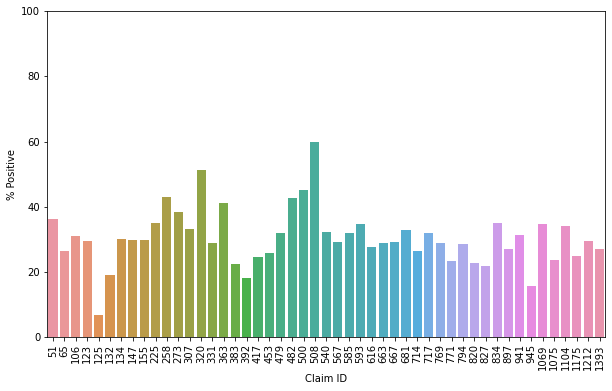

In [263]:
plot_claim_sentiment(c_norm_pos, "% Positive")

C:\Users\palas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


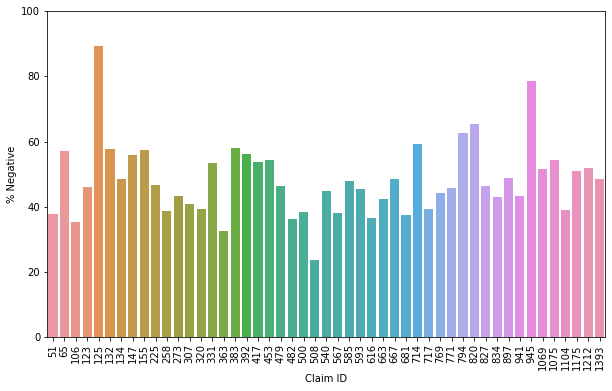

In [264]:
plot_claim_sentiment(c_norm_neg, "% Negative")

C:\Users\palas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


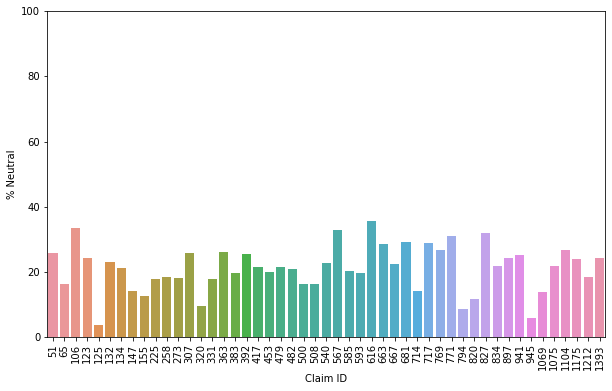

In [265]:
plot_claim_sentiment(c_norm_neut, "% Neutral")

In [266]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [267]:
df

,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time,Sentiment
0,0,1254569956672450561,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",BREAK CURFEW! \r\r\n\r\r\n#COVID1984\r\r\n#SCA...,2020-11-09 13:08:18,2020-11-09,13:08:18,neutral
1,1,1255080816994025474,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",A MASK is better than a VENTILATOR.\r\r\nHOME ...,2020-11-09 06:13:41,2020-11-09,06:13:41,positive
2,2,1251864580298506243,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",The latest One Wireless Place Times! https://t...,2020-11-09 11:04:41,2020-11-09,11:04:41,neutral
3,3,1248753789177335808,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",#Kenya Nakuru - over 500 customers ignoring c...,2020-11-08 09:05:59,2020-11-08,09:05:59,negative
4,4,1252408156036030465,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",Bandaragama Police arrested a suspect who misu...,2020-11-04 12:57:17,2020-11-04,12:57:17,negative
...,...,...,...,...,...,...,...,...,...,...
194255,194255,1252672175032668161,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What is the potential of #5G? What will be its...,2020-07-30 08:31:09,2020-07-30,08:31:09,positive
194256,194256,1248011136999419906,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Until now #Terroristan and #Chinese used to se...,2020-07-21 05:34:28,2020-07-21,05:34:28,negative
194257,194257,1248369367865270273,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Serious question: If someone deliberately coug...,2020-08-01 22:13:01,2020-08-01,22:13:01,negative
194258,194258,1250196981550481408,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What's the thinking behind gathering in large ...,2020-08-02 01:23:47,2020-08-02,01:23:47,negative


In [268]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [269]:
##### LEXICAL DENSITY
### LD 1 - length of set of words in the tweet / length of total words in the tweet
### Known as "Lexical Diversity"

def get_ld1(tweet):
    tweet_words = word_tokenize(tweet.lower())
    len_set = len(set(tweet_words))
    len_total = len(tweet_words)
    ld_1 = len_set/len_total
    return ld_1

# ld1 = get_ld1("A MASK is better than a VENTILATOR. HOME is better than ICU. PREVENTION is better than TREATMENT. Itâ€™s not CURFEW. Itâ€™s CARE for YOU. #COVIDIOTS")
# print(ld1)

ld1 = [get_ld1(tweet) for tweet in df['Tweet']]

In [270]:
### LD 2 - length of content words in the tweet / length of total words in the tweet based on Lexical categories

content_tags = [
    "JJ", # adj
    "JJR", # comparative adj
    "JJS", # superlative adj
    "NN", # common noun singular
    "NNP", # proper noun singular
    "NNPS", # proper noun plural
    "NNS", # common noun plural
    "RB", # adverb
    "RBR", # comparative adverb
    "RBS", # superlative adverb
    "VB", # verb, base form
    "VBD", # verb, past tense
    "VBG", # verb, present participle or gerund
    "VBN", # verb, past participle
    "VBP", # verb, present tense, not 3rd person singular
    "VBZ" # verb, present tense, 3rd person singular
]

def get_ld2(tweet):
    tweet_words = word_tokenize(tweet.lower())
    postags = nltk.pos_tag(tweet_words)
    num_content = 0
    for tag in postags:
        if tag[1] in content_tags:
            num_content += 1
    ld_2 = num_content / len(tweet_words)
    return ld_2

ld2 = [get_ld2(tweet) for tweet in df['Tweet']] 
print(len(ld2))

194260


In [271]:
#nltk.help.upenn_tagset()
def get_ld22(tweet):
    tweet_words = word_tokenize(tweet.lower())
    postags = nltk.pos_tag(tweet_words)
    num_content = 0
    print(postags)
    for tag in postags:
        if tag[1] in content_tags:
            num_content += 1
    ld_2 = num_content / len(tweet_words)
    return ld_2

get_ld22("Notice Democrat-run cities Police standdownrioters destroy propertyattack policekill nursing home patients w/#WuhanVirus!![?]Don't be Democrat #WalkAway #VoteGOP'Minneapolis protests continue despite curfew...  https://t.co/OJ79r2l1go")

[('notice', 'RB'), ('democrat-run', 'JJ'), ('cities', 'NNS'), ('police', 'VBP'), ('standdownrioters', 'NNS'), ('destroy', 'VBP'), ('propertyattack', 'NN'), ('policekill', 'NN'), ('nursing', 'VBG'), ('home', 'NN'), ('patients', 'NNS'), ('w/', 'JJ'), ('#', '#'), ('wuhanvirus', 'NN'), ('!', '.'), ('!', '.'), ('[', 'NN'), ('?', '.'), (']', 'NNS'), ('do', 'VBP'), ("n't", 'RB'), ('be', 'VB'), ('democrat', 'JJ'), ('#', '#'), ('walkaway', 'RB'), ('#', '#'), ("votegop'minneapolis", 'JJ'), ('protests', 'NNS'), ('continue', 'VBP'), ('despite', 'IN'), ('curfew', 'NNS'), ('...', ':'), ('https', 'NN'), (':', ':'), ('//t.co/oj79r2l1go', 'NN')]


0.7428571428571429

In [273]:
df['Lexical Diversity'] = ld1
df['Lexical Density'] = ld2
df.to_csv("../LDData.csv")

In [274]:
import re 

db_stopwords = [
    'iphoto',
    'photo',
    'photograph',
    'foto',
    'screenshot',
    'ss',
    'video',
    'film',
    'facebook',
    'fb',
    'twitter',
    'instagram',
    'insta',
    'whatsapp',
    'graphic',
    'post',
    'audio',
    'clip',
    'show',
    'shown',
]

def remove_stopwords(content):
    stop_words = set(stopwords.words('english'))
    stop_words.update(db_stopwords)
    #word_tokens = word_tokenize(content)
    clean_content = [w for w in content if w not in stop_words]
    return clean_content

def lemmatize_words(content):
    wordnet_lemmatizer = WordNetLemmatizer()
    #word_tokens = word_tokenize(content)
    clean_content = [wordnet_lemmatizer.lemmatize(w) for w in content]
    return clean_content

def stem_words(content):
    porter = PorterStemmer()
    #lan_porter = LancasterStemmer()
    #word_tokens = word_tokenize(content)
    clean_content = [porter.stem(w) for w in content]
    return clean_content

def remove_small_terms(content):
    SMALL_WORD_THRESHOLD = 3
    #word_tokens = word_tokenize(content)
    clean_content = [w for w in content if len(w) > SMALL_WORD_THRESHOLD]
    return clean_content

def remove_punctuation(content):
    content = re.sub(r'http\S+', '', content)
    word_tokens = word_tokenize(content)
    clean_content = [re.sub('[^0-9a-zA-Z]+',' ', w) for w in word_tokens]
    # Removes additional space created because of removing punctuation
    clean_content = [w for w in clean_content if w.strip()]
    return " ".join(clean_content)

In [275]:
def clean_all(content):
    content = content.str.lower()
    
    content = [remove_punctuation(tweet) for tweet in content]
    content = [word_tokenize(tweet) for tweet in content]
    content = [remove_stopwords(tweet) for tweet in content]
    content = [lemmatize_words(tweet) for tweet in content]
    content = [" ".join(tweet) for tweet in content]
    return content

In [276]:
cleaned_tweets = clean_all(df['Tweet'])

In [277]:
df['Cleaned_Tweets'] = cleaned_tweets
df.to_csv('../CleanedTweets.csv')

In [278]:
# temp_df = df.copy()
# temp_df['Tweet'] = cleaned_tweets
# temp_df.drop(['Cleaned_Tweets', 'Sentiment', 'Lexical Diversity', 'Lexical Density'], axis=1, inplace=True)

In [279]:
# temp_df.to_csv('../OnlyCleanedData.csv')

In [280]:
### LD 3 - Number of preprocessed terms in the tweet / length of total terms in the tweet

# def get_ld3(tweet):
#     tweet_words = tweet.split()
#     pp_tweet_words = df[df['Tweet'] == tweet]['Cleaned_Tweets'].iloc[0].split()
#     ld_3 = len(pp_tweet_words) / len(tweet_words)
#     return ld_3

# #ld3 = get_ld3(df.iloc[1]['Tweet'])
# ld3 = [get_ld3(tweet) for tweet in df['Tweet']] 
# #print(ld3)

In [281]:
def get_ld3(df):
    ld_3 = []
    for i in range(len(df)):
        tweet_words = df.iloc[i]['Tweet'].split()
        pp_tweet_words = df.iloc[i]['Cleaned_Tweets'].split()
        ld_3.append(len(pp_tweet_words) / len(tweet_words))
    return ld_3

ld3 = get_ld3(df)

In [282]:
df['LD3'] = ld3
display(df)
#print(df.iloc[0]['Tweet'], df.iloc[0]['Cleaned_Tweets'])
#print(len(df.iloc[0]['Tweet'].split()), len(df.iloc[0]['Cleaned_Tweets'].split()))

df.to_csv('../LDData.csv')

,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time,Sentiment,Lexical Diversity,Lexical Density,Cleaned_Tweets,LD3
0,0,1254569956672450561,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",BREAK CURFEW! \r\r\n\r\r\n#COVID1984\r\r\n#SCA...,2020-11-09 13:08:18,2020-11-09,13:08:18,neutral,0.785714,0.571429,break curfew covid1984 scamdemic unmask burnth...,0.857143
1,1,1255080816994025474,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",A MASK is better than a VENTILATOR.\r\r\nHOME ...,2020-11-09 06:13:41,2020-11-09,06:13:41,positive,0.606061,0.545455,mask better ventilator home better icu prevent...,0.480000
2,2,1251864580298506243,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",The latest One Wireless Place Times! https://t...,2020-11-09 11:04:41,2020-11-09,11:04:41,neutral,0.928571,0.500000,latest one wireless place time ai 5g,0.777778
3,3,1248753789177335808,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",#Kenya Nakuru - over 500 customers ignoring c...,2020-11-08 09:05:59,2020-11-08,09:05:59,negative,0.906250,0.531250,kenya nakuru 500 customer ignoring coronavirus...,0.827586
4,4,1252408156036030465,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",Bandaragama Police arrested a suspect who misu...,2020-11-04 12:57:17,2020-11-04,12:57:17,negative,0.825000,0.575000,bandaragama police arrested suspect misuse cur...,0.757576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194255,194255,1252672175032668161,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What is the potential of #5G? What will be its...,2020-07-30 08:31:09,2020-07-30,08:31:09,positive,0.804878,0.414634,potential 5g opportunity implication smart tec...,0.419355
194256,194256,1248011136999419906,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Until now #Terroristan and #Chinese used to se...,2020-07-21 05:34:28,2020-07-21,05:34:28,negative,0.741379,0.603448,terroristan chinese used send proxy ammunition...,0.681818
194257,194257,1248369367865270273,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Serious question: If someone deliberately coug...,2020-08-01 22:13:01,2020-08-01,22:13:01,negative,0.795918,0.469388,serious question someone deliberately cough al...,0.500000
194258,194258,1250196981550481408,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What's the thinking behind gathering in large ...,2020-08-02 01:23:47,2020-08-02,01:23:47,negative,0.857143,0.571429,thinking behind gathering large group panic bu...,0.642857


In [309]:
def ld_per_category(col):
    cat_means = {}
    cat_std = {}
    for cat in CATEGORIES:
        if cat not in cat_means:
            cat_means[cat] = 0
            cat_std[cat] = 0
        cat_means[cat] = df[df['Category'] == cat][col].mean()
        cat_std[cat] = df[df['Category'] == cat][col].std()
    return cat_means, cat_std

def ld_per_claim(col):
    clm_means = {}
    clm_std = {}
    #print(clm_means)
    for cid in top50cids:
        #print(cid)
        if cid not in clm_means:
            #print('Here')
            clm_means[cid] = 0
            clm_std[cid] = 0
        #print(clm_means)
        clm_means[cid] = df[df['Claim ID'] == cid][col].mean()
        clm_std[cid] = df[df['Claim ID'] == cid][col].std()
    return clm_means, clm_std

In [313]:
ldiv_cat_m, ldiv_cat_std = ld_per_category('Lexical Diversity')
ldiv_cl_m, ldiv_cl_std = ld_per_claim('Lexical Diversity')
lden_cat_m, lden_cat_std = ld_per_category('Lexical Density')
lden_cl_m, lden_cl_std = ld_per_claim('Lexical Density')
ld3_cat_m, ld3_cat_std = ld_per_category('LD3')
ld3_cl_m, ld3_cl_std = ld_per_claim('LD3')

In [420]:
def plot_claim_ld(yaxis, ylabel, error):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(top50cids, yaxis, yerr=error)
    ax.set_ylim([min(yaxis)-0.25,max(yaxis)+0.2])
    plt.xticks(rotation=90)
    plt.xlabel("Claim ID")
    plt.ylabel(ylabel)
    plt.show()

C:\Users\palas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


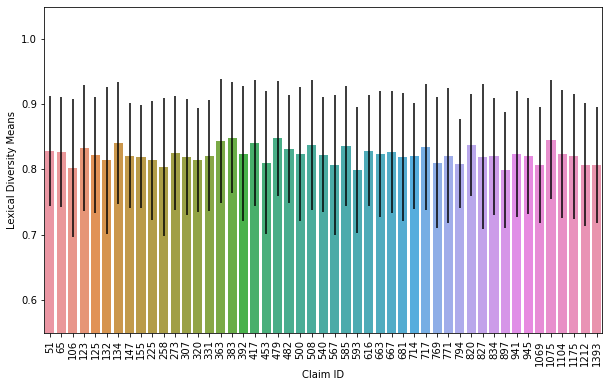

In [421]:
plot_claim_ld([ldiv_cl_m[i] for i in top50cids], "Lexical Diversity Means", [ldiv_cl_std[i] for i in top50cids])


In [446]:
colors = {
    'Public authority actions, policy, and communications' : 'indianred', 
    'Community spread and impact' : 'salmon',
    'Medical advice and self-treatments' : 'bisque',
    'Claims about prominent actors' : 'khaki',
    'Conspiracy theories' : 'palegreen',
    'Virus transmission' : 'paleturquoise',
    'Virus origin and properties' : 'skyblue',
    'Public preparedness, protests, and civil disobedience' : 'thistle',
    'Vaccines, medical treatments, and tests' : 'lightpink',
}

def plot_cat_ld(yaxis, ylabel, error):
    plt.figure(figsize=(10,6))
    ax = plt.bar(cat_idx, yaxis, yerr=error, color=colors.values())
    plt.ylim(min(yaxis)-0.25,max(yaxis)+0.1)
    plt.xticks(np.arange(min(cat_idx), max(cat_idx)+1, 1.0))
    plt.xlabel("Category")
    plt.ylabel(ylabel)
    labels = CATEGORIES
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
def plot_cat_ld3(yaxis, ylabel, error):
    plt.figure(figsize=(10,6))
    ax = plt.bar(cat_idx, yaxis, yerr=error, color=colors.values())
    plt.ylim(min(yaxis)-0.25,max(yaxis)+0.2)
    plt.xticks(np.arange(min(cat_idx), max(cat_idx)+1, 1.0))
    plt.xlabel("Category")
    plt.ylabel(ylabel)
    labels = CATEGORIES
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

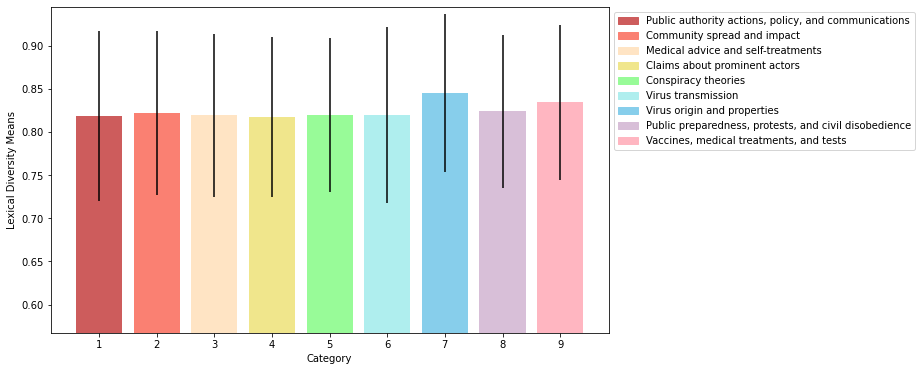

In [423]:
plot_cat_ld(ldiv_cat_m.values(), "Lexical Diversity Means", ldiv_cat_std.values())

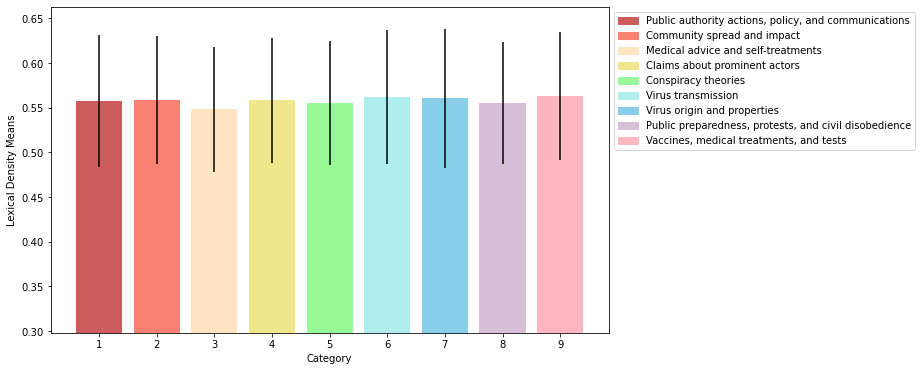

In [424]:
plot_cat_ld(lden_cat_m.values(), "Lexical Density Means", lden_cat_std.values())

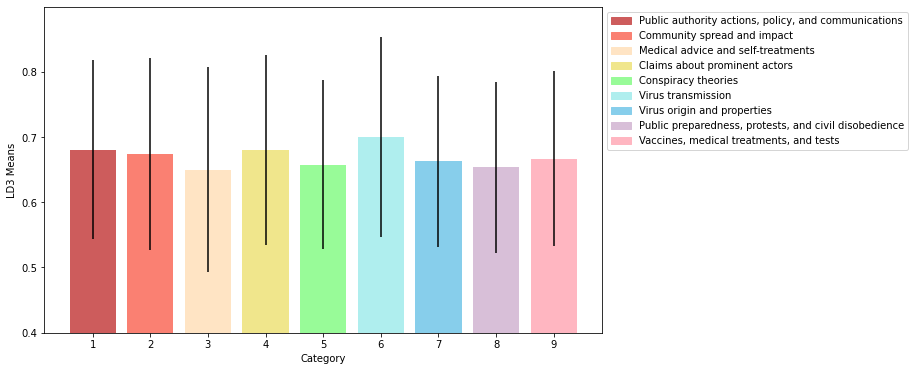

In [447]:
plot_cat_ld3(ld3_cat_m.values(), "LD3 Means", ld3_cat_std.values())

In [436]:
catclaim = {}
for cat in CATEGORIES:
    if cat not in catclaim:
        catclaim[cat] = []
    catclaim[cat] += list(df[df['Category'] == cat]['Claim ID'].unique())
    


{'Public authority actions, policy, and communications': [585,
  593,
  132,
  125,
  540,
  453,
  417,
  155,
  307,
  1104,
  616,
  1069,
  567,
  663],
 'Community spread and impact': [383, 273, 1212, 331, 392, 106, 123],
 'Medical advice and self-treatments': [794,
  717,
  258,
  834,
  225,
  667,
  945,
  500],
 'Claims about prominent actors': [320, 769, 897, 820, 941],
 'Conspiracy theories': [147, 1393, 134],
 'Virus transmission': [681, 1175, 827],
 'Virus origin and properties': [1075],
 'Public preparedness, protests, and civil disobedience': [714, 65, 771],
 'Vaccines, medical treatments, and tests': [51, 479, 508, 363, 482]}

In [442]:
def ld_catclaim(mdic, sdic):
    means = []
    stds = []
    for k, v in catclaim.items():
        m = [mdic[i] for i in v]
        s = [sdic[i] for i in v]
        means.append(np.mean(m))
        stds.append(np.mean(s))
    return means, stds        
    

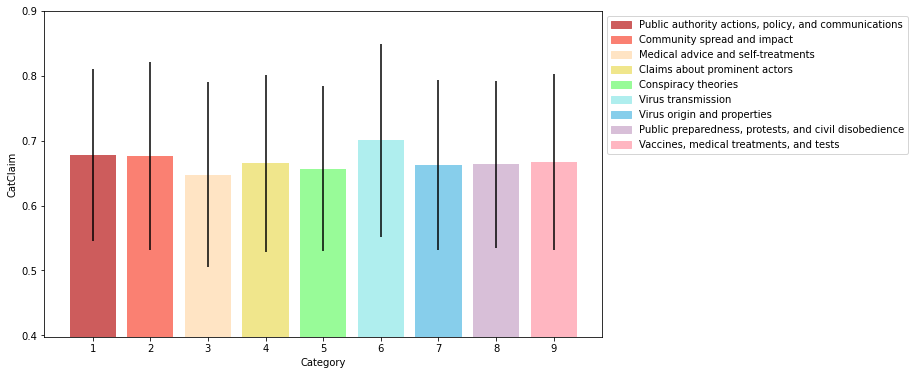

In [448]:
m, s = ld_catclaim(ld3_cl_m, ld3_cl_std)
plot_cat_ld3(m, "CatClaim", s)